<a href="https://colab.research.google.com/github/barcygan/python/blob/master/koronawirus_mapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
from urllib.request import urlopen
import json

with open('/content/powiaty.geojson') as response:
    counties = json.load(response)

import plotly.express as px

In [363]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/covid_powiaty11.xlsx")
df['analiza'] = 'powiat' + ' '+ df['Powiat/Miasto']
df1=df.groupby('analiza').sum().reset_index()


In [364]:
df['analiza'].to_excel('analzia.xls')

In [365]:
import plotly.express as px
import geopandas as gpd


geo = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/plik.geojson')


In [370]:
df.rename(columns={'analiza':'nazwa'},inplace=True)

In [371]:
geo_new = geo.merge(df,on='nazwa')

In [ ]:
geo_new.sort_values(by='Liczba', ascending=False)

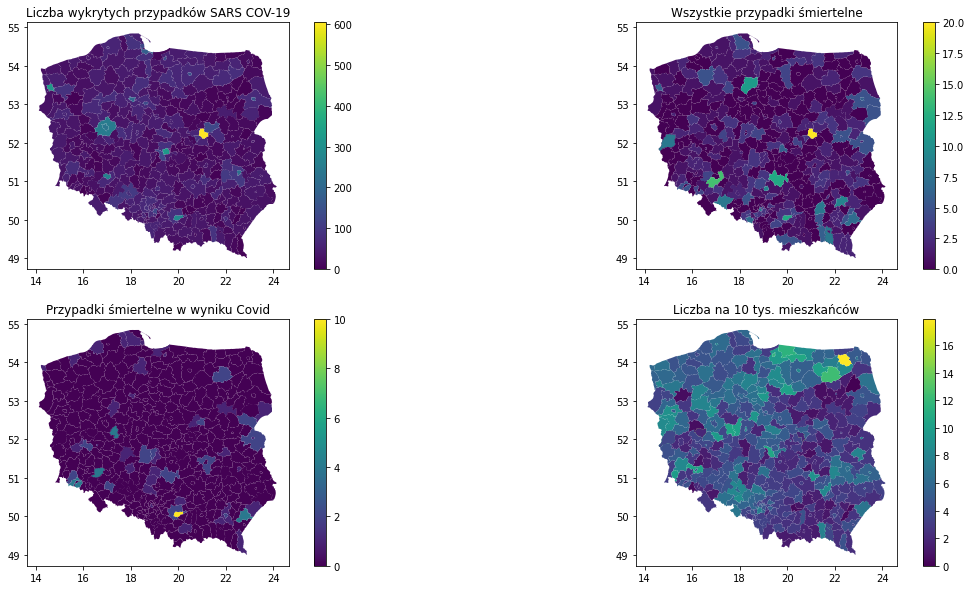

In [399]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 10), ncols=2, nrows=2)
ax[0][0].set_title('Liczba wykrytych przypadków SARS COV-19')

geo_new.plot(column='Liczba',ax=ax[0][0],legend=True,)
ax[0][1].set_title('Wszystkie przypadki śmiertelne')
geo_new.plot(column='Wszystkie przypadki śmiertelne',ax=ax[0][1],legend=True,)

ax[1][0].set_title('Przypadki śmiertelne w wyniku Covid')
geo_new.plot(column='Przypadki śmiertelne w wyniku Covid',ax=ax[1][0],legend=True,)

ax[1][1].set_title('Liczba na 10 tys. mieszkańców')
geo_new.plot(column='Liczba na 10 tys. mieszkańców',ax=ax[1][1],legend=True,)
#geo.boundary.plot()
fig.autofmt_xdate()


#geo.plot(column=df['Liczba'])